# Efficiency, Explainability and Environmental Sustainability in Wastewater Treatment: A Machine Learning-Based Approach to Cost Management and Effluent Quality

In [67]:
import pandas as pd

# read the hourly data
df_hourly = pd.read_csv('data/df_hourly.csv')

In [68]:
# question: do we know how these meters are spread in wwtp? ie do we know the order?
import seaborn as sns

In [69]:
df_hourly.head()

,t,Qi,T,CODi,NH4i,TNi,TSSi,TPi,Qintr,Qr,...,TNo,TSSo,TPo,EQI,SC,AE,PE,ME,OCI,EQI_original
0,0.015625,14406.28225,19.737112,614.746915,19.151799,44.068632,355.109175,8.031241,48134.831,25411.192,...,8.558629,12.121001,1.113214,6677.886750,12132.98000,3933.728500,864.843970,5481.689250,18422.37825,4605.147088
1,0.057292,12837.01100,19.618762,584.179823,16.709277,40.653262,341.804230,8.819089,48134.831,25411.192,...,8.591077,11.486679,1.034620,6464.858700,11993.34150,3545.029650,864.827172,5485.683575,17890.02975,3969.606172
2,0.098958,11749.33225,19.491398,528.349775,14.732324,36.651249,311.960990,8.262622,48134.831,25411.192,...,8.602270,11.144210,0.989105,6344.323675,11878.62725,3246.704825,864.815327,5489.732950,17472.92975,3564.484951
3,0.140625,10914.30350,19.363810,482.648807,14.911990,35.107291,286.976783,7.929862,48134.831,25411.192,...,8.565928,10.953440,0.969153,6281.458800,11783.81600,3039.385450,864.807775,5492.915875,17167.60850,3277.822528
4,0.182292,10515.67700,19.244801,446.465233,14.049397,32.696661,263.812485,7.311440,48134.831,25411.192,...,8.474410,10.839923,0.971374,6260.303300,11648.92400,2884.520650,864.797603,5493.965150,16876.79250,3145.719067


In [70]:
len(df_hourly)

8736

In [71]:
df_hourly.drop(columns=['t', 'EQI'], inplace=True)

In [72]:
df_delay_XX_hours = df_hourly
df_delay_XX_hours.rename(columns={'EQI_original': 'EQI'}, inplace=True)
df_delay_XX_hours

,Qi,T,CODi,NH4i,TNi,TSSi,TPi,Qintr,Qr,Qw,...,NH4o,TNo,TSSo,TPo,SC,AE,PE,ME,OCI,EQI
0,14406.28225,19.737112,614.746915,19.151799,44.068632,355.109175,8.031241,48134.831,25411.192,476.45151,...,0.133928,8.558629,12.121001,1.113214,12132.98000,3933.728500,864.843970,5481.689250,18422.37825,4605.147088
1,12837.01100,19.618762,584.179823,16.709277,40.653262,341.804230,8.819089,48134.831,25411.192,476.45151,...,0.132271,8.591077,11.486679,1.034620,11993.34150,3545.029650,864.827172,5485.683575,17890.02975,3969.606172
2,11749.33225,19.491398,528.349775,14.732324,36.651249,311.960990,8.262622,48134.831,25411.192,476.45151,...,0.129067,8.602270,11.144210,0.989105,11878.62725,3246.704825,864.815327,5489.732950,17472.92975,3564.484951
3,10914.30350,19.363810,482.648807,14.911990,35.107291,286.976783,7.929862,48134.831,25411.192,476.45151,...,0.124853,8.565928,10.953440,0.969153,11783.81600,3039.385450,864.807775,5492.915875,17167.60850,3277.822528
4,10515.67700,19.244801,446.465233,14.049397,32.696661,263.812485,7.311440,48134.831,25411.192,476.45151,...,0.120406,8.474410,10.839923,0.971374,11648.92400,2884.520650,864.797603,5493.965150,16876.79250,3145.719067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,22280.07700,19.957798,716.726378,28.802786,57.082764,398.481652,13.291094,66247.012,28275.330,614.56807,...,0.135538,10.007595,13.543696,1.437180,13157.64025,4712.625150,1069.910475,5705.004650,20292.58775,8311.408718
8732,22516.32750,19.977234,680.968467,25.881294,53.193089,387.179222,12.271937,66247.012,28275.330,614.56807,...,0.133387,9.735007,14.021078,1.444248,13306.95500,5035.466825,1069.924875,5698.191475,20771.57200,8411.718742
8733,18464.83700,19.962686,718.497793,26.427896,55.284096,410.219975,12.952948,66247.012,28275.330,614.56807,...,0.139391,9.511714,13.255109,1.372332,13336.80125,4929.957425,1069.925675,5699.386225,20694.71450,6670.274914
8734,15457.20550,19.915253,722.257912,25.630474,54.933458,420.928455,12.654632,66247.012,28275.330,614.56807,...,0.146743,9.396183,12.209047,1.265232,13216.13400,4483.583075,1069.908850,5702.092900,20124.94950,5329.429387


In [73]:
list_hours_shifted = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15']
fname_prefix = 'data/df_delay_'
fname_postfix='_hours_result_sim2.pkl'

# read the hourly data

for ii in list_hours_shifted:
    file_name = [fname_prefix + ii + fname_postfix]
    print(file_name)
    
    file_name = df_delay_XX_hours.copy(deep=True)
    file_name = df_delay_XX_hours.copy(deep=True)
    list_names = list(df_delay_XX_hours.columns)
    
    
    list_names = list(df_delay_XX_hours.columns)
    for kk in range(1,int(ii)+1):

        shift_no = str(kk)
        df_shift = df_delay_XX_hours.shift(kk)

        # Rename shifted columns
        list_names_new = list(df_delay_XX_hours.columns)
        #print(ii, len(list_names_new))
        iter = len(list_names_new)
        for jj in range(0,iter):
            list_names_new[jj] = list_names[jj]+shift_no
                #print(list_names_new[jj])
            #print(ii, len(list_names))
        df_shift.columns = list_names_new

            # concatenate the shifted inputs
        file_name = pd.concat([file_name, df_shift], axis=1)
        
        
    file_name.dropna(inplace=True)
    file_name.to_pickle(fname_prefix + ii + fname_postfix)

['data/df_delay_1_hours_result_sim2.pkl']
['data/df_delay_2_hours_result_sim2.pkl']
['data/df_delay_3_hours_result_sim2.pkl']
['data/df_delay_4_hours_result_sim2.pkl']
['data/df_delay_5_hours_result_sim2.pkl']
['data/df_delay_6_hours_result_sim2.pkl']
['data/df_delay_7_hours_result_sim2.pkl']
['data/df_delay_8_hours_result_sim2.pkl']
['data/df_delay_9_hours_result_sim2.pkl']
['data/df_delay_10_hours_result_sim2.pkl']
['data/df_delay_11_hours_result_sim2.pkl']
['data/df_delay_12_hours_result_sim2.pkl']
['data/df_delay_13_hours_result_sim2.pkl']
['data/df_delay_14_hours_result_sim2.pkl']
['data/df_delay_15_hours_result_sim2.pkl']


In [74]:
# load package
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator


In [75]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [76]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import numpy as np

In [77]:
best_adj_r2 = 0.0
for kk in list_hours_shifted:
    print(f"Delay: {kk}")       
    # print results to file
    fname_prefix = 'data/df_delay_'
    fname_postfix = '_hours_result_sim2.pkl'
    
    # create the file name and input data
    file_name = fname_prefix + kk + fname_postfix
    df_delay_16_hours_result=pd.read_pickle(file_name)

    # create the output variables
    y_EQI = df_delay_16_hours_result['EQI']
    y_OCI = df_delay_16_hours_result['OCI']
    ys = [(y_EQI, 'eqi'), (y_OCI, 'oci')]

    list_col_drop = ['EQI', 'OCI']
    list_names_new = []
    kk_int=int(kk)
    # remove the columns that are not used in the input data file
    for ii in range(0,len(list_col_drop)):
        for jj in range(1,kk_int+1):
            list_names_new.append(list_col_drop[ii]+str(jj))

    X = df_delay_16_hours_result.drop(columns=list_names_new)
    X = X.drop(columns=['EQI', 'OCI'])

    df_ = df_delay_16_hours_result
    ys = [(y_EQI, 'eqi')] 
    #ys = [(y_OCI, 'oci')] 
    

    for y_, var in ys:
        X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.1, shuffle=False)
        rf_reg = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42, oob_score=True, n_jobs=-1)
        #rf_reg = joblib.load('/home/biljana/Documents/data/superopti/notebooks/models_f_delay_16_hours')     
        rf_reg.fit(X_train, y_train)
        #joblib.dump(rf_reg, fname_prefix + kk + f"_f_{var}", compress=3)

        # Calculate the error and save it in a file
        ################################################################
        # from sklearn.metrics import r2_score, mean_squared_error
        #print(f"R2 score training data {r2_score(y_train, rf_reg.predict(X_train))}")
        #print(f"OOB score: {rf_reg.oob_score_}")   
        y_pred = rf_reg.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        r2 = r2_score(y_test, y_pred)
        n = len(X_test)
        p = len(X_test.columns)
        r2_adj = 1-(1-r2)*(n-1)/(n-p-1)

        if r2 > best_adj_r2:
            best_adj_r2 = r2
            best_delay = kk
            
        print(var)
        print(f"Test r2 score: {r2}")
        print(f"Test r2_adj score: {r2_adj}")
        print(f"test rmse: {rmse}")
        ################################################################

        """
        #print(f"Feature importance for day {days}, var {var}")
        #print(f"Feature importance for day {kk}, var {var}")
        # Calculate feature importances
        importances = rf_reg.feature_importances_

        # Visualize Feature Importance
        # Sort feature importances in descending order
        indices = np.argsort(importances)[::-1]

        # Rearrange feature names so they match the sorted feature importances
        names = [X_train.columns[i] for i in indices]
       
        plt.figure(figsize = (12, 5))
        sns.set_style("whitegrid")
        #chart = sns.barplot(x = names, y=importances[indices])
        chart = sns.barplot(x = names[0:10], y=importances[indices[0:10]])
        plt.xticks(
            rotation=45, 
            horizontalalignment='right',
            fontweight='light'  
        )
        plt.title('Random forest. Feature importance')
        plt.tight_layout()
        
        #plt.savefig('/home/biljana/Documents/data/superopti/notebooks/kaggle-notebooks/Random forest. Feature importance for dealy of '+kk+' hours '+str({var})+'.png')

        #print()
        #print('Figure name is:')
        #print('Random forest. Feature importance for dealy of '+kk+' hours '+str({var})+'.png')
        
        #print()

        #print(f"True vs predicted for day: {kk}, var {var}")
        plt.figure(figsize=(10,10))
        plt.scatter(y_test, y_pred, c='crimson')
        #plt.yscale('log')
        #plt.xscale('log')

        p1 = max(max(y_pred), max(y_test))
        p2 = min(min(y_pred), min(y_test))
        plt.plot([p1, p2], [p1, p2], 'b-')
        plt.xlabel('True Values', fontsize=15)
        plt.ylabel('Predictions', fontsize=15)
        plt.axis('equal')
        """
        #plt.savefig('/home/biljana/Documents/data/superopti/notebooks/kaggle-notebooks/True vs predicted'+kk+str({var})+'.png')
        #plt.show()


        #print(f"Explanation for day: {kk}, var {var}")

        

        #explainer = lime.lime_tabular.LimeTabularExplainer(X_train.to_numpy(), feature_names=X_train.columns, class_names=['EQI'], verbose=True, mode='regression')
        #explainer = lime.lime_tabular.LimeTabularExplainer(X_train.to_numpy(), feature_names=X_train.columns, class_names=[y_], verbose=True, mode='regression')
        
        #i = 125 # explain instance 125
        #exp = explainer.explain_instance(X_test.to_numpy()[i], rf_reg.predict, num_features=20)
print(f"best delay: {best_delay}")

Delay: 1
eqi
Test r2 score: 0.9874361057043541
Test r2_adj score: 0.9865749330231348
test rmse: 492.3039875787188
Delay: 2
eqi
Test r2 score: 0.987403226571856
Test r2_adj score: 0.9860621252182893
test rmse: 492.94773511593706
Delay: 3
eqi
Test r2 score: 0.9867333735337696
Test r2_adj score: 0.9847808608344032
test rmse: 505.8846096744927
Delay: 4
eqi
Test r2 score: 0.9870740068135151
Test r2_adj score: 0.9846051950180064
test rmse: 499.34784262064915
Delay: 5
eqi
Test r2 score: 0.9858228275408657
Test r2_adj score: 0.9824444375080508
test rmse: 522.9570568027776
Delay: 6
eqi
Test r2 score: 0.9865346220244097
Test r2_adj score: 0.982630459179416
test rmse: 509.8236158439173
Delay: 7
eqi
Test r2 score: 0.9897368955677519
Test r2_adj score: 0.9861891557640118
test rmse: 445.092266579241
Delay: 8
eqi
Test r2 score: 0.9902372984105776
Test r2_adj score: 0.986269232603264
test rmse: 434.1058934014201
Delay: 9
eqi
Test r2 score: 0.9902429779928428
Test r2_adj score: 0.9856281702867549
test 

best delay for eqi is 15

eqi
Test r2 score: 0.9907811591254647
Test r2_adj score: 0.9810404970693519
test rmse: 421.84104468993604


/Users/lanacaldarevic/workspace/phd/water-plant-analysis/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lanacaldarevic/workspace/phd/water-plant-analysis/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lanacaldarevic/workspace/phd/water-plant-analysis/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/lanacaldarevic/workspace/phd/water-plant-analysis/env/lib/python3.10/site-packages/seaborn/_ol

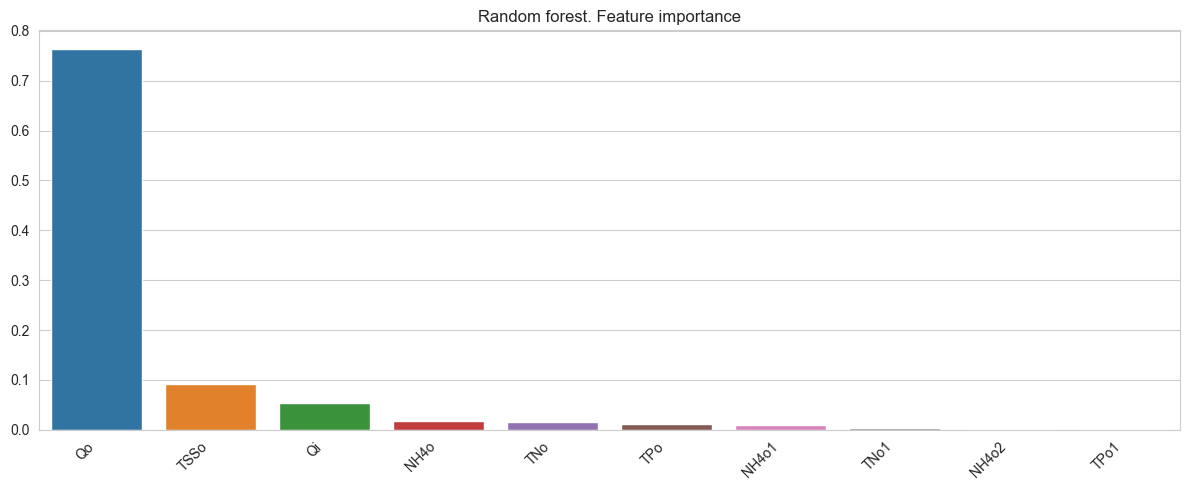

In [79]:
# eqi
kk = '15'
fname_prefix = 'data/df_delay_'
fname_postfix = '_hours_result_sim2.pkl'

# create the file name and input data
file_name = fname_prefix + kk + fname_postfix
df_delay_16_hours_result=pd.read_pickle(file_name)

list_col_drop = ['EQI', 'OCI']
list_names_new = []
kk_int=int(kk)
# remove the columns that are not used in the input data file
for ii in range(0,len(list_col_drop)):
    for jj in range(1,kk_int+1):
        list_names_new.append(list_col_drop[ii]+str(jj))

X = df_delay_16_hours_result.drop(columns=list_names_new)
X = X.drop(columns=['EQI', 'OCI'])
y_ = df_delay_16_hours_result['EQI']



X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.1, shuffle=False)
rf_reg = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42, oob_score=True, n_jobs=-1)
#rf_reg = joblib.load('/home/biljana/Documents/data/superopti/notebooks/models_f_delay_16_hours')     
rf_reg.fit(X_train, y_train)
#joblib.dump(rf_reg, fname_prefix + kk + f"_f_{var}", compress=3)

# Calculate the error and save it in a file
################################################################
# from sklearn.metrics import r2_score, mean_squared_error
#print(f"R2 score training data {r2_score(y_train, rf_reg.predict(X_train))}")
#print(f"OOB score: {rf_reg.oob_score_}")   
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)
n = len(X_test)
p = len(X_test.columns)
r2_adj = 1-(1-r2)*(n-1)/(n-p-1)

if r2_adj > best_adj_r2:
    best_adj_r2 = r2_adj
    best_delay = kk
    
print(var)
print(f"Test r2 score: {r2}")
print(f"Test r2_adj score: {r2_adj}")
print(f"test rmse: {rmse}")
################################################################

#print(f"Feature importance for day {days}, var {var}")
#print(f"Feature importance for day {kk}, var {var}")
# Calculate feature importances
importances = rf_reg.feature_importances_

# Visualize Feature Importance
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

plt.figure(figsize = (12, 5))
sns.set_style("whitegrid")
#chart = sns.barplot(x = names, y=importances[indices])
chart = sns.barplot(x = names[0:10], y=importances[indices[0:10]])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Random forest. Feature importance')
plt.tight_layout()
plt.show()

In [80]:
#oci
best_adj_r2 = 0.0
for kk in list_hours_shifted:
    print(f"Delay: {kk}")       
    # print results to file
    fname_prefix = 'data/df_delay_'
    fname_postfix = '_hours_result_sim2.pkl'
    
    # create the file name and input data
    file_name = fname_prefix + kk + fname_postfix
    df_delay_16_hours_result=pd.read_pickle(file_name)

    # create the output variables
    y_EQI = df_delay_16_hours_result['EQI']
    y_OCI = df_delay_16_hours_result['OCI']
    ys = [(y_EQI, 'eqi'), (y_OCI, 'oci')]

    list_col_drop = ['EQI', 'OCI']
    list_names_new = []
    kk_int=int(kk)
    # remove the columns that are not used in the input data file
    for ii in range(0,len(list_col_drop)):
        for jj in range(1,kk_int+1):
            list_names_new.append(list_col_drop[ii]+str(jj))

    X = df_delay_16_hours_result.drop(columns=list_names_new)
    X = X.drop(columns=['EQI', 'OCI'])

    df_ = df_delay_16_hours_result
   
    ys = [(y_OCI, 'oci')] 
    

    for y_, var in ys:
        X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.1, shuffle=False)
        rf_reg = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42, oob_score=True, n_jobs=-1)
        #rf_reg = joblib.load('/home/biljana/Documents/data/superopti/notebooks/models_f_delay_16_hours')     
        rf_reg.fit(X_train, y_train)
        #joblib.dump(rf_reg, fname_prefix + kk + f"_f_{var}", compress=3)

        # Calculate the error and save it in a file
        ################################################################
        # from sklearn.metrics import r2_score, mean_squared_error
        #print(f"R2 score training data {r2_score(y_train, rf_reg.predict(X_train))}")
        #print(f"OOB score: {rf_reg.oob_score_}")   
        y_pred = rf_reg.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        r2 = r2_score(y_test, y_pred)
        n = len(X_test)
        p = len(X_test.columns)
        r2_adj = 1-(1-r2)*(n-1)/(n-p-1)

        if r2 > best_adj_r2:
            best_adj_r2 = r2
            best_delay = kk
            
        print(var)
        print(f"Test r2 score: {r2}")
        print(f"Test r2_adj score: {r2_adj}")
        print(f"test rmse: {rmse}")
        ################################################################
        """
        #print(f"Feature importance for day {days}, var {var}")
        #print(f"Feature importance for day {kk}, var {var}")
        # Calculate feature importances
        importances = rf_reg.feature_importances_

        # Visualize Feature Importance
        # Sort feature importances in descending order
        indices = np.argsort(importances)[::-1]

        # Rearrange feature names so they match the sorted feature importances
        names = [X_train.columns[i] for i in indices]
       
        plt.figure(figsize = (12, 5))
        sns.set_style("whitegrid")
        #chart = sns.barplot(x = names, y=importances[indices])
        chart = sns.barplot(x = names[0:10], y=importances[indices[0:10]])
        plt.xticks(
            rotation=45, 
            horizontalalignment='right',
            fontweight='light'  
        )
        plt.title('Random forest. Feature importance')
        plt.tight_layout()
    
        #plt.savefig('/home/biljana/Documents/data/superopti/notebooks/kaggle-notebooks/Random forest. Feature importance for dealy of '+kk+' hours '+str({var})+'.png')

        #print()
        #print('Figure name is:')
        #print('Random forest. Feature importance for dealy of '+kk+' hours '+str({var})+'.png')
        
        #print()

        #print(f"True vs predicted for day: {kk}, var {var}")
        plt.figure(figsize=(10,10))
        plt.scatter(y_test, y_pred, c='crimson')
        #plt.yscale('log')
        #plt.xscale('log')

        p1 = max(max(y_pred), max(y_test))
        p2 = min(min(y_pred), min(y_test))
        plt.plot([p1, p2], [p1, p2], 'b-')
        plt.xlabel('True Values', fontsize=15)
        plt.ylabel('Predictions', fontsize=15)
        plt.axis('equal')
        """
        #plt.savefig('/home/biljana/Documents/data/superopti/notebooks/kaggle-notebooks/True vs predicted'+kk+str({var})+'.png')
        #plt.show()


        #print(f"Explanation for day: {kk}, var {var}")

        

        #explainer = lime.lime_tabular.LimeTabularExplainer(X_train.to_numpy(), feature_names=X_train.columns, class_names=['EQI'], verbose=True, mode='regression')
        #explainer = lime.lime_tabular.LimeTabularExplainer(X_train.to_numpy(), feature_names=X_train.columns, class_names=[y_], verbose=True, mode='regression')
        
        #i = 125 # explain instance 125
        #exp = explainer.explain_instance(X_test.to_numpy()[i], rf_reg.predict, num_features=20)
print(f"best delay: {best_delay}")

Delay: 1
oci
Test r2 score: 0.9714288228552568
Test r2_adj score: 0.9694704557559843
test rmse: 287.84740198659745
Delay: 2
oci
Test r2 score: 0.9705597522622655
Test r2_adj score: 0.9674254293091987
test rmse: 292.19244142103327
Delay: 3
oci
Test r2 score: 0.9711004178172427
Test r2_adj score: 0.96684712845526
test rmse: 289.49697432458447
Delay: 4
oci
Test r2 score: 0.9704801150449831
Test r2_adj score: 0.964841937836658
test rmse: 292.5873714876438
Delay: 5
oci
Test r2 score: 0.9693488140203272
Test r2_adj score: 0.9620447016166606
test rmse: 298.14112692802763
Delay: 6
oci
Test r2 score: 0.9696856449838783
Test r2_adj score: 0.9608962757780206
test rmse: 296.64518587912437
Delay: 7
oci
Test r2 score: 0.9693830567459968
Test r2_adj score: 0.9587994220409093
test rmse: 298.1220185994623
Delay: 8
oci
Test r2 score: 0.9678889710716702
Test r2_adj score: 0.9548373915717684
test rmse: 305.3094518233053
Delay: 9
oci
Test r2 score: 0.9683366569249221
Test r2_adj score: 0.9533607514164393
t

best delay for oci is 1

oci
Test r2 score: 0.9714288228552567
Test r2_adj score: 0.9694704557559842
test rmse: 287.8474019865975


/Users/lanacaldarevic/workspace/phd/water-plant-analysis/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lanacaldarevic/workspace/phd/water-plant-analysis/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lanacaldarevic/workspace/phd/water-plant-analysis/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/lanacaldarevic/workspace/phd/water-plant-analysis/env/lib/python3.10/site-packages/seaborn/_ol

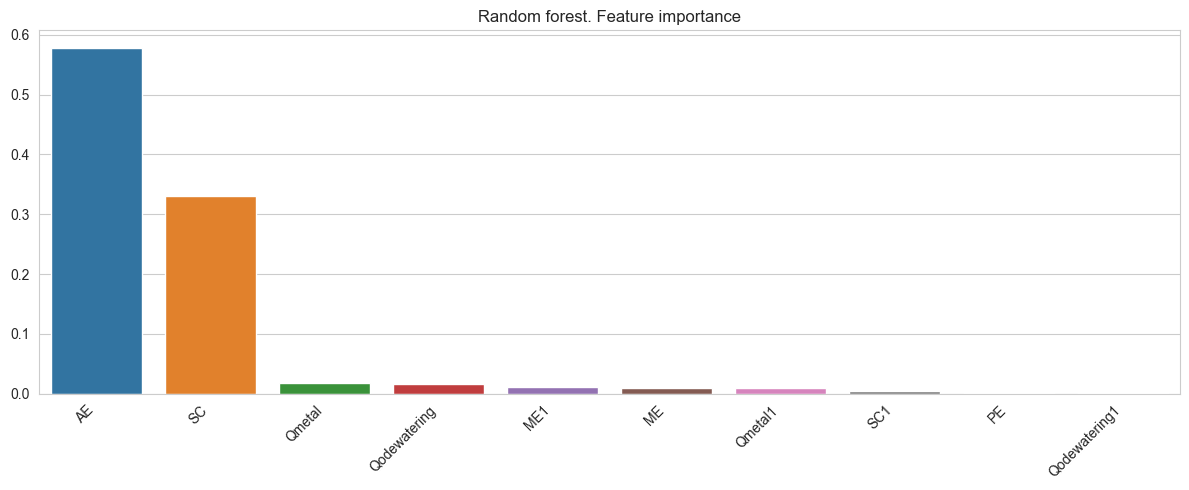

In [81]:
# OCI
kk = '1'
fname_prefix = 'data/df_delay_'
fname_postfix = '_hours_result_sim2.pkl'

# create the file name and input data
file_name = fname_prefix + kk + fname_postfix
df_delay_16_hours_result=pd.read_pickle(file_name)

list_col_drop = ['EQI', 'OCI']
list_names_new = []
kk_int=int(kk)
# remove the columns that are not used in the input data file
for ii in range(0,len(list_col_drop)):
    for jj in range(1,kk_int+1):
        list_names_new.append(list_col_drop[ii]+str(jj))

X = df_delay_16_hours_result.drop(columns=list_names_new)
X = X.drop(columns=['EQI', 'OCI'])
y_ = df_delay_16_hours_result['OCI']



X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.1, shuffle=False)
rf_reg = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42, oob_score=True, n_jobs=-1)
#rf_reg = joblib.load('/home/biljana/Documents/data/superopti/notebooks/models_f_delay_16_hours')     
rf_reg.fit(X_train, y_train)
#joblib.dump(rf_reg, fname_prefix + kk + f"_f_{var}", compress=3)

# Calculate the error and save it in a file
################################################################
# from sklearn.metrics import r2_score, mean_squared_error
#print(f"R2 score training data {r2_score(y_train, rf_reg.predict(X_train))}")
#print(f"OOB score: {rf_reg.oob_score_}")   
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)
n = len(X_test)
p = len(X_test.columns)
r2_adj = 1-(1-r2)*(n-1)/(n-p-1)

if r2_adj > best_adj_r2:
    best_adj_r2 = r2_adj
    best_delay = kk
    
print(var)
print(f"Test r2 score: {r2}")
print(f"Test r2_adj score: {r2_adj}")
print(f"test rmse: {rmse}")
################################################################

#print(f"Feature importance for day {days}, var {var}")
#print(f"Feature importance for day {kk}, var {var}")
# Calculate feature importances
importances = rf_reg.feature_importances_

# Visualize Feature Importance
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

plt.figure(figsize = (12, 5))
sns.set_style("whitegrid")
#chart = sns.barplot(x = names, y=importances[indices])
chart = sns.barplot(x = names[0:10], y=importances[indices[0:10]])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Random forest. Feature importance')
plt.tight_layout()
plt.show()